# Initialise the libs

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

from math import ceil

# Load the data

In [141]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

regressionDir = '/home/weenkus/workspace/Machine Learning - University of Washington/Regression/datasets/'

sales = pd.read_csv(regressionDir + 'kc_house_data.csv', dtype = dtype_dict)
sales = sales.sort(['sqft_living','price'])

# dtype_dict same as above
set_1 = pd.read_csv(regressionDir + 'wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv(regressionDir + 'wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv(regressionDir + 'wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv(regressionDir + 'wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

train_valid_shuffled = pd.read_csv(regressionDir + 'wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv(regressionDir + 'wk3_kc_house_test_data.csv', dtype=dtype_dict)
training =  pd.read_csv(regressionDir + 'wk3_kc_house_train_data.csv', dtype=dtype_dict)

/home/weenkus/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


# Data exploration

In [121]:
# Show plots in jupyter
%matplotlib inline

sales.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
19452  3980300371  20140926T000000  142000         0       0.00          290   
15381  2856101479  20140701T000000  276000         1       0.75          370   
860    1723049033  20140620T000000  245000         1       0.75          380   
18379  1222029077  20141029T000000  265000         0       0.75          384   
4868   6896300380  20141002T000000  228000         0       1.00          390   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
19452     20875       1           0     0     ...          1         290   
15381      1801       1           0     0     ...          5         370   
860       15000       1           0     0     ...          5         380   
18379    213444       1           0     0     ...          4         384   
4868       5900       1           0     0     ...          4         390   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
19452              0      1963             0    98024  47.5308 -121.888   
15381              0      1923             0    98117  47.6778 -122.389   
860                0      1963             0    98168  47.4810 -122.323   
18379              0      2003             0    98070  47.4177 -122.491   
4868               0      1953             0    98118  47.5260 -122.261   

       sqft_living15  sqft_lot15  
19452           1620       22850  
15381           1340        5000  
860             1170       15000  
18379           1920      224341  
4868            2170        6000  

[5 rows x 21 columns]

In [122]:
sales['price'].head()

19452    142000
15381    276000
860      245000
18379    265000
4868     228000
Name: price, dtype: float64

# Helper functions

In [123]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature;
            poly_dataframe[name] = poly_dataframe[name].apply(lambda x: x**power)
    return poly_dataframe

# Ridge regression model fitting

In [124]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
print(poly15_data)

       power_1    power_2       power_3       power_4       power_5  \
19452      290      84100  2.438900e+07  7.072810e+09  2.051115e+12   
15381      370     136900  5.065300e+07  1.874161e+10  6.934396e+12   
860        380     144400  5.487200e+07  2.085136e+10  7.923517e+12   
18379      384     147456  5.662310e+07  2.174327e+10  8.349416e+12   
4868       390     152100  5.931900e+07  2.313441e+10  9.022420e+12   
21332      390     152100  5.931900e+07  2.313441e+10  9.022420e+12   
8623       410     168100  6.892100e+07  2.825761e+10  1.158562e+13   
11500      420     176400  7.408800e+07  3.111696e+10  1.306912e+13   
14466      420     176400  7.408800e+07  3.111696e+10  1.306912e+13   
465        430     184900  7.950700e+07  3.418801e+10  1.470084e+13   
1168       440     193600  8.518400e+07  3.748096e+10  1.649162e+13   
18052      460     211600  9.733600e+07  4.477456e+10  2.059630e+13   
12075      470     220900  1.038230e+08  4.879681e+10  2.293450e+13   
15248 

In [125]:
l2_small_penalty = 1.5e-5
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [126]:
model.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085686e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

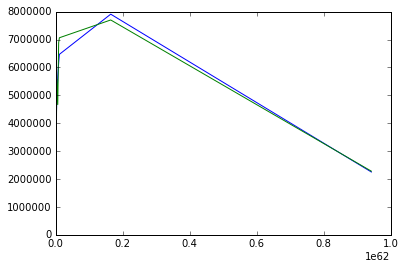

In [127]:
plt.plot(poly15_data, model.predict(poly15_data), poly15_data, sales['price'])
plt.show()

# Ridge regression on subsets

### Using ridge regression with small l2

In [128]:
l2_small_penalty=1e-9

poly15_data_set1 = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model1 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model1.fit(poly15_data_set1, set_1['price'])

poly15_data_set2 = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model2 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model2.fit(poly15_data_set2, set_2['price'])

poly15_data_set3 = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model3 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model3.fit(poly15_data_set3, set_3['price'])

poly15_data_set4 = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model4 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model4.fit(poly15_data_set4, set_4['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

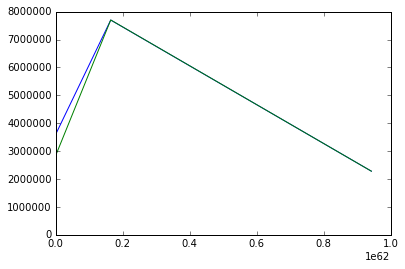

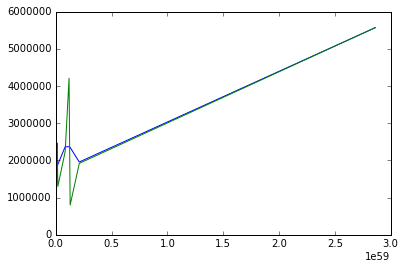

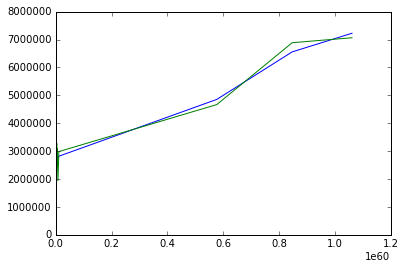

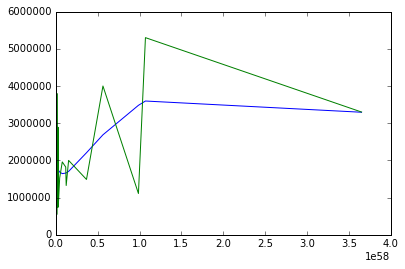

In [129]:
plt.plot(poly15_data_set1, model1.predict(poly15_data_set1), poly15_data_set1, set_1['price'])
plt.show()

plt.plot(poly15_data_set2, model2.predict(poly15_data_set2), poly15_data_set2, set_2['price'])
plt.show()

plt.plot(poly15_data_set3, model3.predict(poly15_data_set3), poly15_data_set3, set_3['price'])
plt.show()

plt.plot(poly15_data_set4, model4.predict(poly15_data_set4), poly15_data_set4, set_4['price'])
plt.show()

In [130]:
print('Model 1 coefficients: ', model1.coef_)
print('Model 2 coefficients: ', model2.coef_)
print('Model 3 coefficients: ', model3.coef_)
print('Model 4 coefficients: ', model4.coef_)

Model 1 coefficients:  [  5.44669376e+02  -3.55447580e-01   1.22446368e-04  -1.17175278e-08
  -3.90512972e-13  -1.39075896e-17   1.47860259e-20   6.87492376e-25
  -7.57204175e-29  -1.04097336e-32  -3.71843943e-37   3.39989317e-41
   5.56591999e-45   2.53761435e-49  -3.35152943e-53]
Model 2 coefficients:  [  8.59362612e+02  -8.18118183e-01   4.28879879e-04  -9.12770077e-08
  -2.69606133e-12   3.73980536e-15  -1.42711908e-19  -6.30794906e-23
  -1.44559687e-27   7.44321610e-31   9.25866075e-35   3.27974536e-41
  -1.29543502e-42  -1.38781261e-46   1.66546452e-50]
Model 3 coefficients:  [ -7.55395916e+02   9.75579484e-01  -4.58945974e-04   7.77958020e-08
   7.15013519e-12  -2.88601996e-15  -2.13677987e-20   3.38085238e-23
   2.19178142e-27  -1.97067733e-31  -4.15993090e-35  -1.80196317e-39
   3.19071186e-43   5.08456981e-47  -3.93304294e-51]
Model 4 coefficients:  [  1.11944572e+03  -9.83760236e-01   3.38770920e-04   3.60377089e-08
  -4.37813981e-11   5.77191626e-15   7.66795302e-19  -9.492

### Applying a higher L2 value

In [131]:
l2_large_penalty=1.23e2

poly15_data_set1 = polynomial_dataframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model1 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model1.fit(poly15_data_set1, set_1['price'])

poly15_data_set2 = polynomial_dataframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model2 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model2.fit(poly15_data_set2, set_2['price'])

poly15_data_set3 = polynomial_dataframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model3 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model3.fit(poly15_data_set3, set_3['price'])

poly15_data_set4 = polynomial_dataframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model4 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
model4.fit(poly15_data_set4, set_4['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

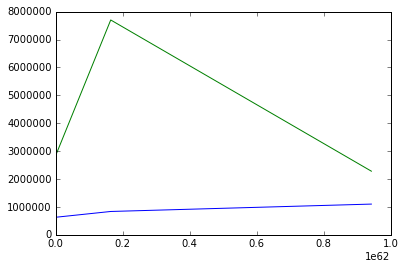

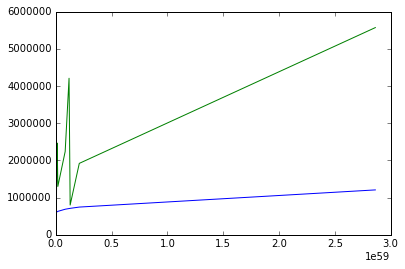

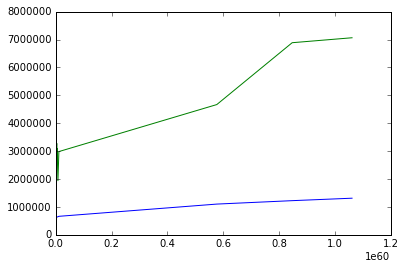

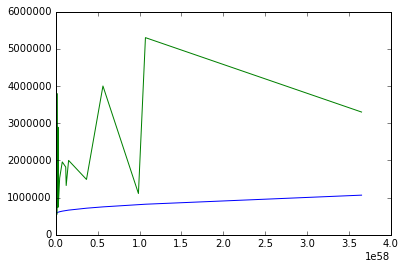

In [132]:
plt.plot(poly15_data_set1, model1.predict(poly15_data_set1), poly15_data_set1, set_1['price'])
plt.show()

plt.plot(poly15_data_set2, model2.predict(poly15_data_set2), poly15_data_set2, set_2['price'])
plt.show()

plt.plot(poly15_data_set3, model3.predict(poly15_data_set3), poly15_data_set3, set_3['price'])
plt.show()

plt.plot(poly15_data_set4, model4.predict(poly15_data_set4), poly15_data_set4, set_4['price'])
plt.show()

In [133]:
print('Model 1 coefficients: ', model1.coef_)
print('Model 2 coefficients: ', model2.coef_)
print('Model 3 coefficients: ', model3.coef_)
print('Model 4 coefficients: ', model4.coef_)

Model 1 coefficients:  [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]
Model 2 coefficients:  [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]
Model 3 coefficients:  [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]
Model 4 coefficients:  [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.346

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

...

Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

In [134]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    sumRSS = 0
    
    for i in range(k):
        # Get the validation/training interval
        start = (n*i)/k
        end = (n*(i+1))/k-1
        #print (i, (ceil(start), ceil(end)))
        train_valid_shuffled[0:ceil(start)].append(train_valid_shuffled[ceil(end)+1:n])   
        
        # Train the model
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(data, output)
    
        # Calculate RSS
        RSS = (abs(output - model.predict(data)) ** 2).sum()
        
        # Add the RSS to the sum for computing the average
        sumRSS += RSS
    return (sumRSS / k)

In [135]:
print (k_fold_cross_validation(10, 1e-9, poly15_data_set2, set_2['price']))

296862792315373.44


# Minimize the l2 by using cross validation

In [136]:
import sys

l2s = np.logspace(3, 9, num=13)
train_valid_shuffled_poly15 = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
k = 10

minError = sys.maxsize
for l2 in l2s:
    avgError = k_fold_cross_validation(k, l2, train_valid_shuffled_poly15, train_valid_shuffled['price'])
    print ('For l2:', l2, ' the CV is ', avgError)
    if avgError < minError:
        minError = avgError 
        bestl2 = l2
        
print (minError)
print (bestl2)

For l2: 1000.0  the CV is  2650520195070680.0
For l2: 3162.27766017  the CV is  2657012027282295.0
For l2: 10000.0  the CV is  2659080208536254.5
For l2: 31622.7766017  the CV is  2659735771406552.5
For l2: 100000.0  the CV is  2659943233824360.5
For l2: 316227.766017  the CV is  2660008854743339.0
For l2: 1000000.0  the CV is  2660029607454739.5
For l2: 3162277.66017  the CV is  2660036170193829.0
For l2: 10000000.0  the CV is  2660038245529684.5
For l2: 31622776.6017  the CV is  2660038901810067.5
For l2: 100000000.0  the CV is  2660039109344276.0
For l2: 316227766.017  the CV is  2660039174972390.5
For l2: 1000000000.0  the CV is  2660039195725831.0
2650520195070680.0
1000.0


# Use the best l2 to train the model on all the data

In [166]:
train_poly15 = polynomial_dataframe(training['sqft_living'], 15)
test_poly15 = polynomial_dataframe(test['sqft_living'], 15)

model = linear_model.Ridge(alpha=1000, normalize=True)
model.fit(train_poly15, training['price'])

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [167]:
print("Residual sum of squares: %.2f"
  % ((model.predict(test_poly15) - test['price']) ** 2).sum())

Residual sum of squares: 283756877067954.88
